# **vgames2.csv 파일 불러와 결측치 제거**

In [260]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import math
import random

In [261]:
df = pd.read_csv('vgames2.csv')
df.head(15) 

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [262]:
df.shape

(16598, 10)

In [263]:
# 결측치 개수를 확인
df.isnull().sum()

# Year에서 결측치 271개
# Genre에서 결측치 50개
# Publisher에서 결측치 58개

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [264]:
# 결측치가 존재하는 행만을 추출하여 확인
missing_values = df[df.isna().any(axis=1)]
missing_values

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...,...
16425,16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16431,16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16432,16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16555,16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [265]:
# 데이터의 개수가 (row, column) = (16598, 10) 이므로 결측치 총 379개는 삭제해도 영향을 크게 미치지않을 것 같다고 판단하여 결측치 모두 제거
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [266]:
# Unnamed: 0 은 의미없는 column 이므로 삭제필요
df.drop(['Unnamed: 0'], axis = 1, inplace= True)

In [267]:
# 각 열의 데이터타입을 확인
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [268]:
# 'Year' 열의 데이터타입을 정수형으로 변환
df['Year'] = df['Year'].astype(int)
df['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16241, dtype: int64

In [269]:
# 판매량 열에서 'K' 가 포함된 행들의 인덱스 추출
NA_k_indices = df[df['NA_Sales'].str.contains('K')].index
EU_k_indices = df[df['EU_Sales'].str.contains('K')].index
JP_k_indices = df[df['JP_Sales'].str.contains('K')].index
Other_k_indices = df[df['Other_Sales'].str.contains('K')].index

In [270]:
# 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' 열에서 K와 M이 포함된 데이터들에서 K와 M을 제거
df['NA_Sales'] = df['NA_Sales'].str.replace('K', '').str.replace('M', '').astype(float)
df['EU_Sales'] = df['EU_Sales'].str.replace('K', '').str.replace('M', '').astype(float)
df['JP_Sales'] = df['JP_Sales'].str.replace('K', '').str.replace('M', '').astype(float)
df['Other_Sales'] = df['Other_Sales'].str.replace('K', '').str.replace('M', '').astype(float)


In [271]:
# 'NA_Sales' 열에서 'K'를 포함하는 행들에 0.001을 곱하여 수정
df.loc[NA_k_indices, 'NA_Sales'] *= 0.001
df.loc[EU_k_indices, 'EU_Sales'] *= 0.001
df.loc[JP_k_indices, 'JP_Sales'] *= 0.001
df.loc[Other_k_indices, 'Other_Sales'] *= 0.001

In [272]:
# 수정을 완료하고 각 컬럼의 데이터타입을 확인
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

# **'Name' 칼럼의 이상치를 확인**

In [273]:
df['Name'].duplicated().sum()

4946

In [274]:
# 'Name', 'Platform', 'Year', 'Genre' 열이 모두 중복인 값을 확인
df_duplicated_Name = df[df.duplicated(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], keep = False)]
df_duplicated_Name

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7346,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.0,0.22
8717,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00


In [275]:
# 'Name', 'Platform', 'Year', 'Genre' 열이 모두 중복인 열을 병합
grouped = df_duplicated_Name.groupby(['Name', 'Platform', 'Year', 'Genre', 'Publisher'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
df = df.drop_duplicates(subset=['Name', 'Platform', 'Year', 'Genre', 'Publisher'], keep = False)
df = df.append(grouped, ignore_index=True)

In [276]:
df[df['Name'] == 'Madden NFL 13']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4736,Madden NFL 13,X360,2012,Sports,Electronic Arts,2.53,0.16,0.0,0.17
5175,Madden NFL 13,WiiU,2012,Sports,Electronic Arts,0.22,0.00,0.0,0.02
9318,Madden NFL 13,PSV,2012,Sports,Electronic Arts,0.30,0.00,0.0,0.03
11745,Madden NFL 13,Wii,2012,Sports,Electronic Arts,0.51,0.00,0.0,0.03
16239,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.24,0.0,0.22


In [277]:
df['Name'].value_counts()

Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Ratatouille                     9
FIFA 14                         9
LEGO Jurassic World             8
                               ..
Pokemon Ranger                  1
Virtual Soccer                  1
Neighborhood Games              1
Nonomura Byoin no Hitobito      1
Rainbow Islands: Revolution     1
Name: Name, Length: 11295, dtype: int64

In [278]:
df[df['Name'] == 'Need for Speed: Most Wanted']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1298,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.80,0.01,0.15
1489,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.51,0.06,0.61
2621,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05
4571,Need for Speed: Most Wanted,GBA,2005,Racing,Electronic Arts,0.19,0.07,0.00,0.00
10820,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.01,0.25
11103,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47
11923,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02
12266,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10
13327,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.14,0.12,0.00,0.02
13512,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.00,0.06,0.00,0.02


In [279]:
df[df['Name'] == 'LEGO Marvel Super Heroes']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3207,LEGO Marvel Super Heroes,XOne,2013,Action,Warner Bros. Interactive Entertainment,0.61,0.34,0.00,0.09
3668,LEGO Marvel Super Heroes,WiiU,2013,Action,Warner Bros. Interactive Entertainment,0.31,0.35,0.02,0.06
4167,LEGO Marvel Super Heroes,PC,2013,Action,Warner Bros. Interactive Entertainment,0.04,0.12,0.00,0.02
4875,LEGO Marvel Super Heroes,PSV,2013,Action,Warner Bros. Interactive Entertainment,0.15,0.35,0.00,0.16
10801,LEGO Marvel Super Heroes,PS3,2013,Action,Warner Bros. Interactive Entertainment,0.77,0.85,0.01,0.37
10913,LEGO Marvel Super Heroes,DS,2013,Action,Warner Bros. Interactive Entertainment,0.28,0.17,0.00,0.04
12320,LEGO Marvel Super Heroes,PS4,2013,Action,Warner Bros. Interactive Entertainment,0.59,0.75,0.01,0.21
12537,LEGO Marvel Super Heroes,X360,2013,Action,Warner Bros. Interactive Entertainment,1.24,0.85,0.00,0.21
13455,LEGO Marvel Super Heroes,3DS,2013,Action,Warner Bros. Interactive Entertainment,0.42,0.36,0.04,0.07


In [280]:
#  'Name' 이 중복되어도 'Platform',	'Year',	'Genre' 에서 다른 값들을 가지고 있으므로 더이상 중복된값들은 제거하지 않기로 결정

# **'Platform' 컬럼의 이상치를 확인**

In [281]:
df['Platform'].value_counts()

DS      2127
PS2     2121
PS3     1298
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [282]:
# 개수가 적은 3DO, TG16, GG, PCFX 도 찾아본 결과 실제 존재하는 게임 플랫폼이므로 'Platform' 열에서는 이상치가 없다고 판단

# **'Year' 컬럼의 이상치를 확인**

In [283]:
# df 의 'Year' 열의 값들을 내림차순으로 정렬
df['Year'].sort_values(ascending=False)

6765     2020
9909     2017
14901    2017
5196     2017
5324     2016
         ... 
8506        1
2206        1
16040       0
14350       0
9092        0
Name: Year, Length: 16240, dtype: int64

In [284]:
# df 의 'Year' 열의 값들을 오름차순으로 정렬
df['Year'].sort_values(ascending=True)

14350       0
9092        0
16040       0
8506        1
2206        1
         ... 
3433     2016
9909     2017
14901    2017
5196     2017
6765     2020
Name: Year, Length: 16240, dtype: int64

In [285]:
# df 의 'Year' 열의 값 중 0~99 까지의 값들의 개수 확인
between_0_99 = df[(df.Year >= 0) & (df.Year < 100)]
len(between_0_99)

100

In [286]:
# df 의 'Year' 열의 값 중 100~1899 까지의 값들의 개수 확인
between_100_1899 = df[(df.Year >= 100) & (df.Year < 1900)]
len(between_100_1899)

0

In [287]:
# df 의 'Year' 열의 값 중 1900 이상인 값들의 개수 확인
over_1900 = df[df.Year >= 1900]
len(over_1900)

16140

In [288]:
# df 의 'Year' 열의 값 중 0~20 까지의 값들의 개수 확인
between_0_20 = df[(df.Year >= 0) & (df.Year < 21)]
len(between_0_20)

86

In [289]:
# df 의 'Year' 열의 값 중 80~99 까지의 값들의 개수 확인
between_80_99 = df[(df.Year >= 80) & (df.Year < 100)]
len(between_80_99)

14

In [290]:
# 'Year' 열에서 1900보다 작은 값들은 총 100개이며 그 중 86개가 0~20 사이의 수이고 14개가 80~99사이의 숫자임을 알 수 있다.
# 즉 0~20 사이의 숫자는 2000년대, 80~99 사이의 숫자는 1900년대로 바꾸는 것이 타당해보인다.

In [291]:
# 0~20 사이의 숫자는 2000을 더해주고 80~99 사이의 숫자는 1900을 더해주는 코드
df.loc[df.Year.between(0, 20), 'Year'] += 2000
df.loc[df.Year.between(80, 99), 'Year'] += 1900

In [292]:
df['Year'].sort_values(ascending=True)

# 오름차순으로 정렬해본 결과 잘 적용됐음을 확인할 수 있다.

5817     1980
9043     1980
12857    1980
14689    1980
7171     1980
         ... 
12876    2016
14901    2017
5196     2017
9909     2017
6765     2020
Name: Year, Length: 16240, dtype: int64

# **'Genre' 컬럼의 이상치를 확인**

In [293]:
df['Genre'].value_counts()

Action          3240
Sports          2298
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [294]:
# 'Genre' 열에는 이상치가 없다고 판단

# **'Publisher' 컬럼의 이상치를 확인**

In [295]:
# 'Publisher' 열에서 Unknown인 열 추출
df[df['Publisher'] == 'Unknown']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
30,Kids Learn Music A+ Edition,DS,2011,Misc,Unknown,0.05,0.00,0.00,0.00
209,Wild West Shootout,Wii,2010,Shooter,Unknown,0.01,0.01,0.00,0.00
381,Gummy Bears Mini Golf,Wii,2010,Sports,Unknown,0.04,0.00,0.00,0.00
596,God Eater,PSP,2010,Action,Unknown,0.00,0.00,0.72,0.00
612,Blitz: The League,PS2,2005,Sports,Unknown,0.74,0.03,0.00,0.12
...,...,...,...,...,...,...,...,...,...
15795,Chibi-Robo! Park Patrol,DS,2007,Adventure,Unknown,0.00,0.00,0.19,0.00
15814,Red Stone DS: Akaki Ishi ni Michibikareshi Mon...,DS,2011,Role-Playing,Unknown,0.00,0.00,0.01,0.00
16046,Afrika,PS3,2008,Adventure,Unknown,0.12,0.00,0.08,0.01
16048,The Golf Club,XOne,2014,Sports,Unknown,0.02,0.00,0.00,0.00


In [296]:
# 'Publisher' 열에서 Unknown인 열이 99개가 존재하는데 나머지 값(Name, Platform, Year 등등)들은 유효하다고 판단하여 제거하지 않기로 결정

In [297]:
publisher_counts = df['Publisher'].value_counts()
publisher_counts

Electronic Arts                 1331
Activision                       963
Namco Bandai Games               924
Ubisoft                          913
Konami Digital Entertainment     821
                                ... 
Marvelous Games                    1
Panther Software                   1
Playmore                           1
mixi, Inc                          1
Mystique                           1
Name: Publisher, Length: 575, dtype: int64

In [298]:
# df 의 'Publisher' 열의 빈도수가 1인 값들만 확인
publisher_counts_1 = publisher_counts[publisher_counts == 1]
publisher_counts_1

Hello Games                  1
2D Boy                       1
Technos Japan Corporation    1
Piacci                       1
Giga                         1
                            ..
Marvelous Games              1
Panther Software             1
Playmore                     1
mixi, Inc                    1
Mystique                     1
Name: Publisher, Length: 191, dtype: int64

In [299]:
# 빈도수가 1인 값들만 191개로 실제로 존재하는 Publisher 인지 아닌지 판단하기 어려우므로 이상치가 없다고 가정

# **지역에 따라서 선호하는 게임 장르**

In [300]:
# 기존 데이터프레임에서 필요한 열만 선택
df1 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16235,Action,0.01,0.00,0.00,0.00
16236,Sports,0.44,0.19,0.03,0.13
16237,Action,0.05,0.05,0.25,0.03
16238,Fighting,0.00,0.00,0.16,0.01


In [301]:
# 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' 열의 통계 정보
df1.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16240.000000,16240.000000,16240.000000,16240.000000
mean,0.265212,0.147387,0.078288,0.048237
std,0.822453,0.508354,0.309281,0.189683
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.040000
max,41.490000,29.020000,10.220000,10.570000


In [302]:
# 'groupby()' 매서드를 활용해 Genre 별 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales' 의 합을 확인
df_by_region = df1.groupby('Genre').sum()
df_by_region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


In [303]:
df_by_region[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

NA_Sales       4307.04
EU_Sales       2393.57
JP_Sales       1271.39
Other_Sales     783.37
dtype: float64

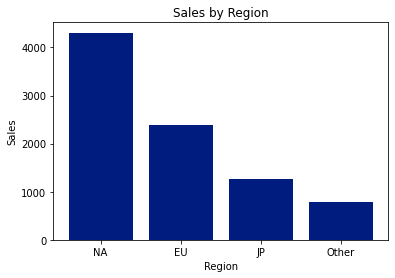

In [340]:
df5 = pd.DataFrame({
    'Sales': [4307.04, 2393.57, 1271.39, 783.37],
    'Region': ['NA', 'EU', 'JP', 'Other']
})

plt.bar(df5['Region'], df5['Sales'])
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
ax.set_xticklabels(df5['Region'], rotation=0)
plt.show()

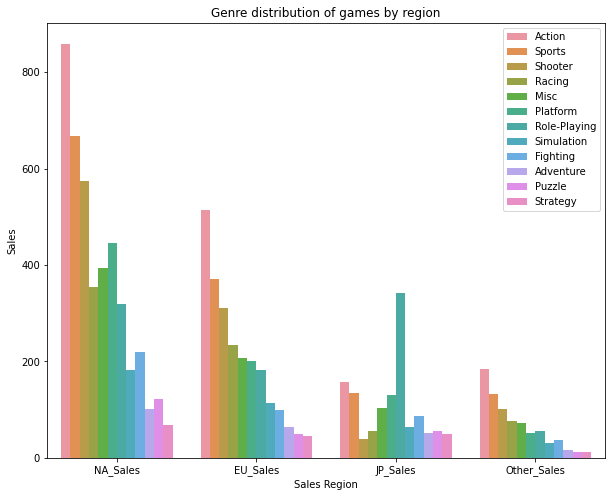

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df2 = pd.DataFrame({
    'NA_Sales': [858.75, 101.79, 220.35, 394.73, 445.38, 121.58, 354.70, 318.76, 574.48, 181.43, 667.26, 67.83],
    'EU_Sales': [513.64, 63.66, 99.90, 208.15, 200.63, 50.47, 235.02, 183.09, 310.23, 112.99, 370.97, 44.82],
    'JP_Sales': [156.60, 51.87, 87.14, 104.18, 130.53, 56.24, 56.32, 342.93, 38.18, 63.54, 134.76, 49.10],
    'Other_Sales': [183.99, 16.70, 36.15, 72.64, 51.45, 12.44, 76.51, 56.73, 101.86, 31.32, 132.35, 11.23]
}, index = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'])

df2['NA_Sales'] = df2['NA_Sales'].astype(float)
df2['EU_Sales'] = df2['EU_Sales'].astype(float)
df2['JP_Sales'] = df2['JP_Sales'].astype(float)
df2['Other_Sales'] = df2['Other_Sales'].astype(float)

# 데이터프레임을 'Sales'와 'Region' 열을 추가한 데이터프레임으로 변환
df2_melt = df2.melt(var_name='Region', value_name='Sales', ignore_index=False)

# 지역별 판매량이 제일 높은 순으로 정렬
df2_melt_sorted = df2_melt.sort_values(by=['Region', 'Sales'], ascending=[True, False])
df2_melt_sorted['Region'] = pd.Categorical(df2_melt_sorted['Region'], categories=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ordered=True)

# 그래프 그리기
plt.figure(figsize=(10,8))
sns.set_palette("dark")
sns.barplot(x='Region', y='Sales', hue='index', data=df2_melt_sorted.reset_index(),ci=None)

plt.xlabel('Sales Region')
plt.ylabel('Sales')
plt.title('Genre distribution of games by region')
plt.legend(loc='upper right')

plt.show()

In [305]:
# 'NA_Sales', 'EU_Sales', 'Other_Sales' 는 Action,Sports,Shooter 순으로 판매량이 가장 높다.
# 'JP_Sales' 만 예외적으로 Role-Playing, Action, Sports 순으로 판매량이 높다.

In [306]:
# 북미지역에서의 출고량을 기준으로 가장 높은 출고량을 가진 장르 3개
Top3_NA = df_by_region.nlargest(3, 'NA_Sales')
Top3_NA

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Sports,667.26,370.97,134.76,132.35
Shooter,574.48,310.23,38.18,101.86


In [307]:
# 유럽지역에서의 출고량을 기준으로 가장 높은 출고량을 가진 장르 3개
Top3_EU = df_by_region.nlargest(3, 'EU_Sales')
Top3_EU

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Sports,667.26,370.97,134.76,132.35
Shooter,574.48,310.23,38.18,101.86


In [308]:
# 일본지역에서의 출고량을 기준으로 가장 높은 출고량을 가진 장르 3개
Top3_JP = df_by_region.nlargest(3, 'JP_Sales')
Top3_JP

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Role-Playing,318.76,183.09,342.93,56.73
Action,858.75,513.64,156.60,183.99
Sports,667.26,370.97,134.76,132.35


In [309]:
# 기타지역에서의 출고량을 기준으로 가장 높은 출고량을 가진 장르 3개
Top3_Other = df_by_region.nlargest(3, 'Other_Sales')
Top3_Other

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Sports,667.26,370.97,134.76,132.35
Shooter,574.48,310.23,38.18,101.86


# **연도별 게임의 트렌드**

In [310]:
def get_category(year):
    if year >= 1980 and year < 1990:
        return '1980'
    elif year >= 1990 and year < 2000:
        return '1990'
    elif year >= 2000 and year < 2010:
        return '2000'
    elif year >= 2010 and year < 2020:
        return '2010'
    elif year >= 2020 and year < 2030:
        return '2020'
    else:
        return 'Unknown'

df['Decade'] = df['Year'].apply(get_category)
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Decade
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,2000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,2010
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,2010
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,2010
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,2000
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,2010
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,2000
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,2000
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,2010


In [311]:
# 기존 데이터프레임에서 필요한 열만 선택
df3 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Decade']]
df3

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Decade
0,Action,0.04,0.00,0.00,0.00,2000
1,Action,0.17,0.00,0.00,0.01,2000
2,Adventure,0.00,0.00,0.02,0.00,2010
3,Misc,0.04,0.00,0.00,0.00,2010
4,Platform,0.12,0.09,0.00,0.04,2010
...,...,...,...,...,...,...
16235,Action,0.01,0.00,0.00,0.00,2000
16236,Sports,0.44,0.19,0.03,0.13,2010
16237,Action,0.05,0.05,0.25,0.03,2010
16238,Fighting,0.00,0.00,0.16,0.01,1990


In [312]:
grouped = df3.groupby(['Decade', 'Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
grouped['Total_Sales'] = grouped['NA_Sales'] + grouped['EU_Sales'] + grouped['JP_Sales'] + grouped['Other_Sales']

# Decade 별 Genre의 판매량을 내림차순으로 정렬
sorted_grouped_1980s = grouped.loc['1980'].sort_values('Total_Sales', ascending=False)
sorted_grouped_1990s = grouped.loc['1990'].sort_values('Total_Sales', ascending=False)
sorted_grouped_2000s = grouped.loc['2000'].sort_values('Total_Sales', ascending=False)
sorted_grouped_2010s = grouped.loc['2010'].sort_values('Total_Sales', ascending=False)
sorted_grouped_2020s = grouped.loc['2020'].sort_values('Total_Sales', ascending=False)

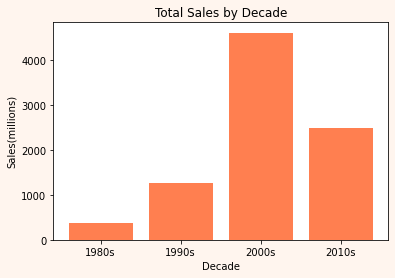

In [313]:
grouped.groupby('Decade')['Total_Sales'].sum()

data = {'Decade': ['1980s', '1990s', '2000s', '2010s', '2020s'],
        'Total_Sales': [375.98, 1275.19, 4612.42, 2491.49, 0.29]}

df_decade = pd.DataFrame(data, columns=['Decade', 'Total_Sales'])
df_decade.drop([4], axis = 0, inplace = True)

plt.figure(facecolor='seashell')
bar_colors = 'coral'

plt.bar(df_decade['Decade'], df_decade['Total_Sales'], color=bar_colors)
plt.xlabel('Decade')
plt.ylabel('Sales(millions)')
plt.title('Total Sales by Decade')
plt.show()

In [314]:
# 1980년대 부터 게임의 판매량이 증가하다가 2000년대에 최고점을 찍고 다시 내려가고 있는 추세이다.

# **1980년대 트랜드**

In [315]:
sorted_grouped_1980s

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Platform,74.34,13.24,32.45,2.23,122.26
Puzzle,43.69,5.43,12.47,1.16,62.75
Shooter,50.84,2.83,5.30,0.80,59.77
Action,37.90,4.29,8.31,0.60,51.10
Sports,10.69,2.54,18.20,0.35,31.78
Role-Playing,1.06,0.00,12.68,1.51,15.25
Racing,6.82,1.36,3.69,0.23,12.10
Misc,3.35,0.20,4.86,0.03,8.44
Fighting,3.52,0.69,2.92,0.11,7.24


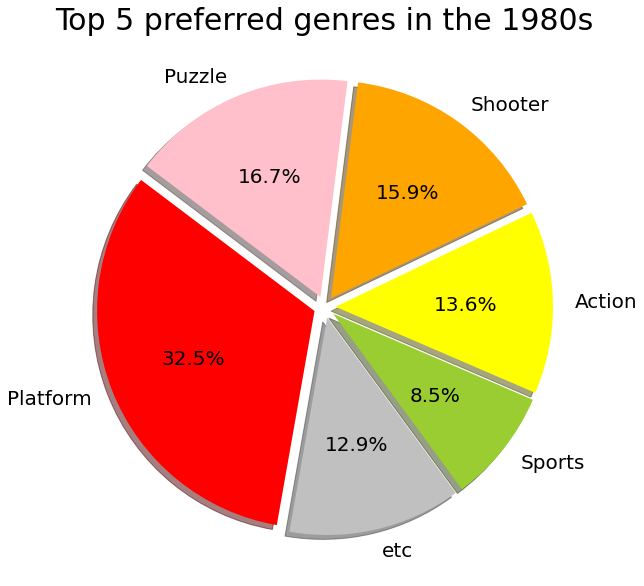

In [316]:
# 1980년대 Genre별 선호도 Top5
import matplotlib.pyplot as plt

ratio = [122.26, 62.75, 59.77, 51.10, 31.78, 48.32]
labels = ['Platform', 'Puzzle', 'Shooter', 'Action', 'Sports', 'etc']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['red', 'pink', 'orange', 'yellow', 'yellowgreen','silver']

plt.figure(figsize = (10, 10))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle = 260, counterclock = False, explode = explode, shadow = True, colors = colors, textprops={'fontsize': 20})
plt.title('Top 5 preferred genres in the 1980s', fontsize=30)
plt.show()

# **1990년대 트랜드**

In [317]:
sorted_grouped_1990s

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Platform,112.55,46.15,42.99,7.18,208.87
Role-Playing,46.06,32.13,98.31,6.27,182.77
Racing,77.05,40.62,24.91,6.23,148.81
Sports,70.66,29.18,40.85,5.78,146.47
Action,72.94,40.08,19.60,6.53,139.15
Fighting,56.21,23.80,39.47,4.03,123.51
Shooter,38.76,17.67,10.10,2.36,68.89
Misc,30.89,13.68,16.73,2.13,63.43
Strategy,21.67,12.24,21.59,2.01,57.51


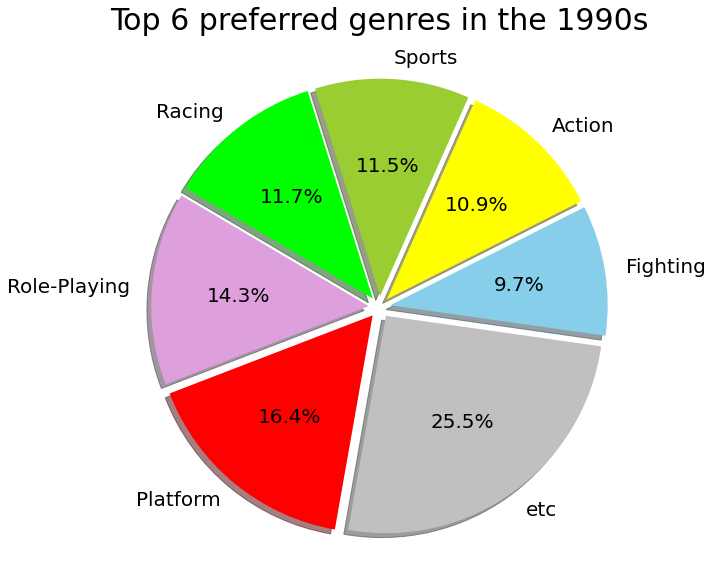

In [318]:
# 1990년대 Genre별 선호도 Top6
import matplotlib.pyplot as plt

ratio = [208.87, 182.77, 148.81, 146.47, 139.15, 123.51, 325.61]
labels = ['Platform', 'Role-Playing', 'Racing', 'Sports', 'Action', 'Fighting', 'etc']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['red', 'plum', 'lime', 'yellowgreen', 'yellow', 'skyblue', 'silver']

plt.figure(figsize = (10, 10))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle = 260, counterclock = False, explode = explode, shadow = True, colors = colors, textprops={'fontsize': 20})
plt.title('Top 6 preferred genres in the 1990s', fontsize=30)
plt.show()

# **2000년대 트랜드**

In [319]:
sorted_grouped_2000s

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,461.51,234.28,58.31,99.03,853.13
Sports,431.88,223.62,60.37,86.94,802.81
Misc,237.26,129.85,61.14,50.28,478.53
Racing,225.21,137.53,21.07,54.19,438.00
Shooter,257.25,123.29,9.24,43.67,433.45
Role-Playing,169.24,81.26,135.84,25.86,412.20
Platform,203.02,102.57,39.34,31.20,376.13
Simulation,136.51,79.14,26.86,23.13,265.64
Fighting,122.06,54.64,31.00,23.56,231.26


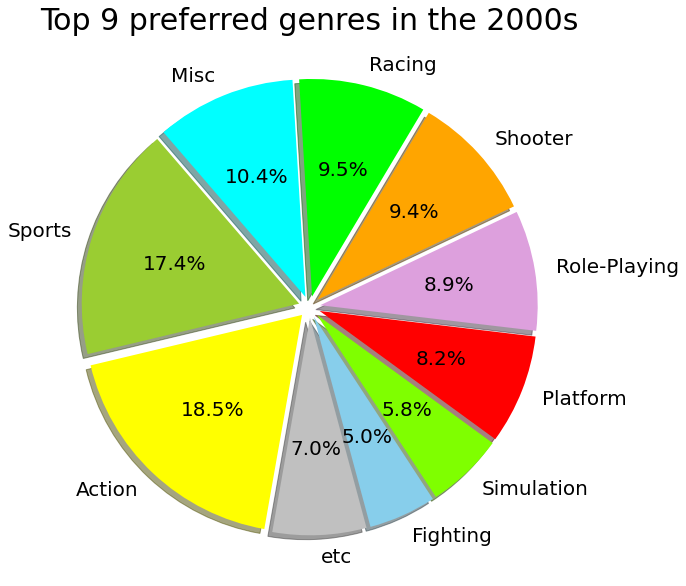

In [320]:
# 2000년대 Genre별 선호도 Top9
import matplotlib.pyplot as plt

ratio = [853.13, 802.81, 478.53, 438.00, 433.45, 412.20, 376.13, 265.64, 231.64, 321.27]
labels = ['Action', 'Sports', 'Misc', 'Racing', 'Shooter', 'Role-Playing', 'Platform', 'Simulation','Fighting', 'etc']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['yellow', 'yellowgreen', 'cyan', 'lime', 'orange', 'plum','red', 'chartreuse', 'skyblue','silver']

plt.figure(figsize = (10, 10))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle = 260, counterclock = False, explode = explode, shadow = True, colors = colors, textprops={'fontsize': 20})
plt.title('Top 9 preferred genres in the 2000s', fontsize=30)
plt.show()

# **2010년대 트랜드**

In [321]:
sorted_grouped_2010s

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,286.40,234.99,70.38,77.83,669.60
Shooter,227.63,166.44,13.54,55.03,462.64
Sports,154.03,115.63,15.34,39.28,324.28
Role-Playing,102.40,69.70,96.10,23.09,291.29
Misc,123.23,64.42,21.45,20.20,229.30
Racing,45.62,55.51,6.65,15.86,123.64
Platform,55.47,38.67,15.75,10.84,120.73
Fighting,38.56,20.77,13.75,8.45,81.53
Simulation,26.42,25.20,13.20,5.98,70.80


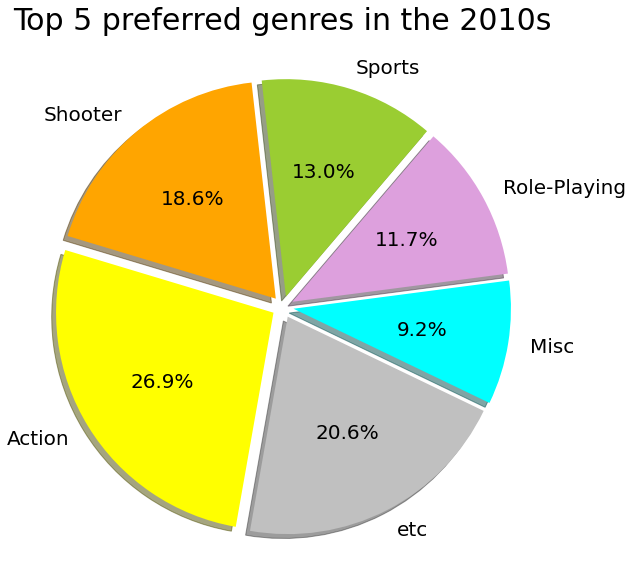

In [322]:
# 2010년대 Genre별 선호도 Top5
import matplotlib.pyplot as plt

ratio = [669.60, 462.64, 324.28, 291.29, 229.30, 514.38]
labels = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'etc']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['yellow', 'orange', 'yellowgreen', 'plum', 'cyan', 'silver']

plt.figure(figsize = (10, 10))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle = 260, counterclock = False, explode = explode, shadow = True, colors = colors, textprops={'fontsize': 20})
plt.title('Top 5 preferred genres in the 2010s', fontsize=30)
plt.show()

In [323]:
# 게임이 출시된 연도를 10년단위로 묶어 총 판매량 변화와 장르별 판매량들을 살펴보았다.
# 파이차트를 이용해 1980년대부터 2010년대 까지의 장르별 판매량들을 살펴본 결과 트랜드가 조금씩 변화한다는 것이 확인 가능하다.

In [324]:
grouped

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Decade Genre                                                               
1980   Action           37.90      4.29      8.31         0.60        51.10
       Adventure         2.57      0.52      1.61         0.08         4.78
       Fighting          3.52      0.69      2.92         0.11         7.24
       Misc              3.35      0.20      4.86         0.03         8.44
       Platform         74.34     13.24     32.45         2.23       122.26
       Puzzle           43.69      5.43     12.47         1.16        62.75
       Racing            6.82      1.36      3.69         0.23        12.10
       Role-Playing      1.06      0.00     12.68         1.51        15.25
       Shooter          50.84      2.83      5.30         0.80        59.77
       Simulation        0.42      0.07      0.00         0.02         0.51
       Sports           10.69      2.54     18.20         0.35        31.78
1990   Action           72.94     40.08     19.60         6.53       139.15
       Adventure        16.81     13.18     13.29         1.52        44.80
       Fighting         56.21     23.80     39.47         4.03       123.51
       Misc             30.89     13.68     16.73         2.13        63.43
       Platform        112.55     46.15     42.99         7.18       208.87
       Puzzle           13.29      4.60     20.03         1.02        38.94
       Racing           77.05     40.62     24.91         6.23       148.81
       Role-Playing     46.06     32.13     98.31         6.27       182.77
       Shooter          38.76     17.67     10.10         2.36        68.89
       Simulation       17.81      8.58     23.48         2.17        52.04
       Sports           70.66     29.18     40.85         5.78       146.47
       Strategy         21.67     12.24     21.59         2.01        57.51
2000   Action          461.51    234.28     58.31        99.03       853.13
       Adventure        61.77     30.89     21.67         9.26       123.59
       Fighting        122.06     54.64     31.00        23.56       231.26
       Misc            237.26    129.85     61.14        50.28       478.53
       Platform        203.02    102.57     39.34        31.20       376.13
       Puzzle           55.21     33.67     20.34         8.64       117.86
       Racing          225.21    137.53     21.07        54.19       438.00
       Role-Playing    169.24     81.26    135.84        25.86       412.20
       Shooter         257.25    123.29      9.24        43.67       433.45
       Simulation      136.51     79.14     26.86        23.13       265.64
       Sports          431.88    223.62     60.37        86.94       802.81
       Strategy         32.91     20.28     20.91         5.72        79.82
2010   Action          286.40    234.99     70.38        77.83       669.60
       Adventure        20.64     19.07     15.30         5.84        60.85
       Fighting         38.56     20.77     13.75         8.45        81.53
       Misc            123.23     64.42     21.45        20.20       229.30
       Platform         55.47     38.67     15.75        10.84       120.73
       Puzzle            9.39      6.77      3.40         1.62        21.18
       Racing           45.62     55.51      6.65        15.86       123.64
       Role-Playing    102.40     69.70     96.10        23.09       291.29
       Shooter         227.63    166.44     13.54        55.03       462.64
       Simulation       26.42     25.20     13.20         5.98        70.80
       Sports          154.03    115.63     15.34        39.28       324.28
       Strategy         13.25     12.30      6.60         3.50        35.65
2020   Simulation        0.27      0.00      0.00         0.02         0.29

In [325]:
# 장르별 Decade에 따른 Total_Sales 를 확인하기 위해 각 장르를 추출
Action_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Action']
Action_df = Action_df.reset_index()

Adventure_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Adventure']
Adventure_df = Adventure_df.reset_index()

Fighting_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Fighting']
Fighting_df = Fighting_df.reset_index()

Misc_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Misc']
Misc_df = Misc_df.reset_index()

Platform_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Platform']
Platform_df = Platform_df.reset_index()

Puzzle_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Puzzle']
Puzzle_df = Puzzle_df.reset_index()

Racing_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Racing']
Racing_df = Racing_df.reset_index()

Role_Playing_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Role-Playing']
Role_Playing_df = Role_Playing_df.reset_index()

Shooter_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Shooter']
Shooter_df = Shooter_df.reset_index()

Simulation_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Simulation']
Simulation_df = Simulation_df.reset_index()

Sports_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Sports']
Sports_df = Sports_df.reset_index()

Strategy_df = grouped.loc[grouped.index.get_level_values('Genre') == 'Strategy']
Strategy_df = Strategy_df.reset_index()

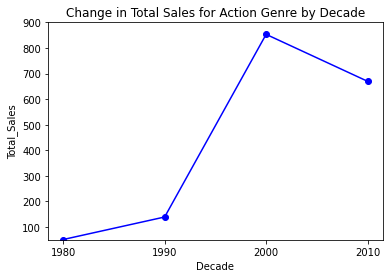

In [326]:
# Action 장르 게임의 판매량 변화
Action_df['Decade'] = Action_df['Decade'].astype(int)

plt.plot(Action_df['Decade'], Action_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(50, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Action Genre by Decade')
plt.show()

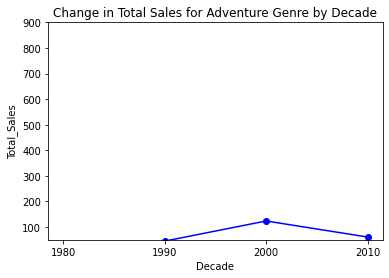

In [327]:
# Adventure 장르 게임의 판매량 변화
Adventure_df['Decade'] = Adventure_df['Decade'].astype(int)

plt.plot(Adventure_df['Decade'], Adventure_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(50, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Adventure Genre by Decade')
plt.show()

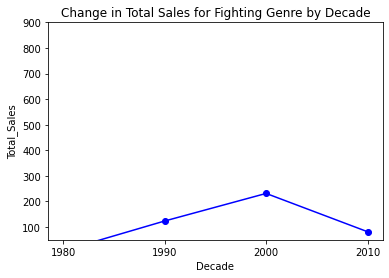

In [328]:
# Fighting 장르 게임의 판매량 변화
Fighting_df['Decade'] = Fighting_df['Decade'].astype(int)

plt.plot(Fighting_df['Decade'], Fighting_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(50, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Fighting Genre by Decade')
plt.show()

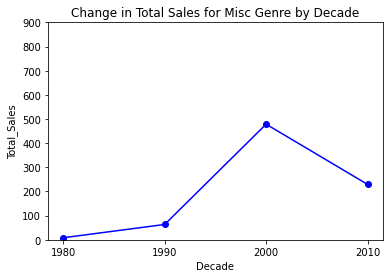

In [329]:
# Misc 장르 게임의 판매량 변화
Misc_df['Decade'] = Misc_df['Decade'].astype(int)

plt.plot(Misc_df['Decade'], Misc_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(0, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Misc Genre by Decade')
plt.show()

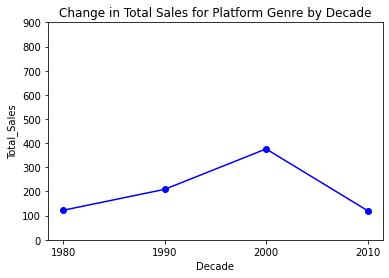

In [330]:
# Platform 장르 게임의 판매량 변화
Platform_df['Decade'] = Platform_df['Decade'].astype(int)

plt.plot(Platform_df['Decade'], Platform_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(0, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Platform Genre by Decade')
plt.show()

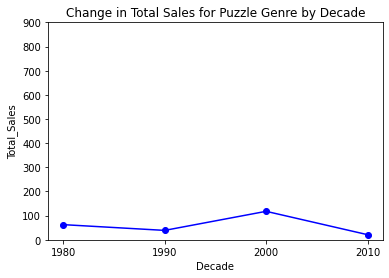

In [331]:
# Puzzle 장르 게임의 판매량 변화
Puzzle_df['Decade'] = Puzzle_df['Decade'].astype(int)

plt.plot(Puzzle_df['Decade'], Puzzle_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(0, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Puzzle Genre by Decade')
plt.show()

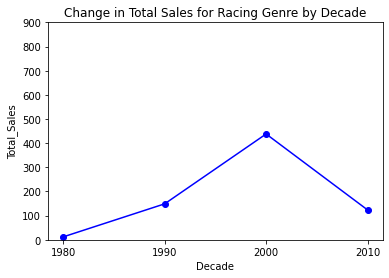

In [332]:
# Racing 장르 게임의 판매량 변화
Racing_df['Decade'] = Racing_df['Decade'].astype(int)

plt.plot(Racing_df['Decade'], Racing_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(0, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Racing Genre by Decade')
plt.show()

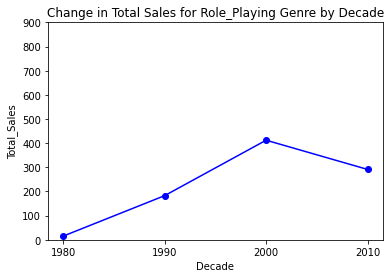

In [333]:
# Role_Playing 장르 게임의 판매량 변화
Role_Playing_df['Decade'] = Role_Playing_df['Decade'].astype(int)

plt.plot(Role_Playing_df['Decade'], Role_Playing_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(0, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Role_Playing Genre by Decade')
plt.show()

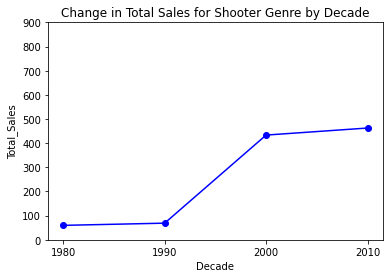

In [334]:
# Shooter 장르 게임의 판매량 변화
Shooter_df['Decade'] = Shooter_df['Decade'].astype(int)

plt.plot(Shooter_df['Decade'], Shooter_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(0, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Shooter Genre by Decade')
plt.show()

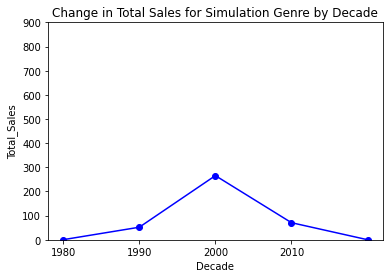

In [335]:
# Simulation 장르 게임의 판매량 변화
Simulation_df['Decade'] = Simulation_df['Decade'].astype(int)

plt.plot(Simulation_df['Decade'], Simulation_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(0, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Simulation Genre by Decade')
plt.show()

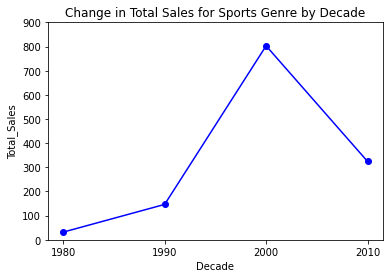

In [336]:
# Sports 장르 게임의 판매량 변화
Sports_df['Decade'] = Sports_df['Decade'].astype(int)

plt.plot(Sports_df['Decade'], Sports_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(0, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Sports Genre by Decade')
plt.show()

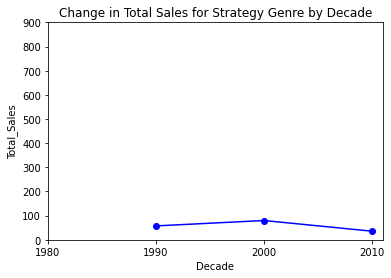

In [337]:
# Strategy 장르 게임의 판매량 변화
Strategy_df['Decade'] = Strategy_df['Decade'].astype(int)

plt.plot(Strategy_df['Decade'], Strategy_df['Total_Sales'], color='blue', linestyle='-', marker='o')
plt.xticks(range(1980, 2020, 10))
plt.ylim(0, 900)
plt.xlabel('Decade')
plt.ylabel('Total_Sales')
plt.title('Change in Total Sales for Strategy Genre by Decade')
plt.show()